# Step 1 - Setup Environment
---


In [63]:
# !pip install --upgrade ipykernel

In [64]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# For missing values
import missingno as msno

# Linear algebra operations
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, mutual_info_regression

from sklearn.model_selection import train_test_split

# For those who use Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/DSDH/

In [65]:
import warnings
warnings.filterwarnings('ignore')

# Step 2 - Data Preprocessing
---

## 1. Read Dataset

We use the dataset from homework 2.

In [66]:
# Dataset Path:
data_save_path = './final_dataset.csv' # hw3.csv

In [67]:
# Read file
df = pd.read_csv(data_save_path)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# Print first 5 rows
df.head()

The dataset has 1743 rows and 37 columns


,subject_id,gender,anchor_age,race,vasopressin_usage,urineoutput,hemoglobin_min,hemoglobin_max,creatinine_min,creatinine_max,...,temperature_min,temperature_max,temperature_mean,ventilation_status,vent_invasive,vent_supplemental,vent_hfnc,vent_noninvasive,vent_trach,label
0,14743163,M,58,WHITE,0,1600.0,11.4,12.6,0.5,0.7,...,35.67,36.67,36.223333,1,NaN,1.0,NaN,NaN,NaN,0
1,15012696,M,39,WHITE,0,1440.0,13.6,14.7,1.2,1.3,...,36.22,37.56,36.776667,1,NaN,1.0,NaN,NaN,NaN,0
2,15797206,M,53,WHITE,0,300.0,15.3,15.3,0.8,0.8,...,36.44,37.06,36.777500,0,NaN,NaN,NaN,NaN,NaN,0
3,19547502,F,23,WHITE,0,3120.0,10.3,11.7,0.5,0.8,...,36.56,37.00,36.757500,0,NaN,NaN,NaN,NaN,NaN,0
4,13129657,M,23,WHITE,0,2720.0,12.5,13.3,0.8,0.8,...,36.67,37.83,37.144000,3,2.0,1.0,NaN,NaN,NaN,0


## 2. Overview

In [68]:
columns = list(df.columns)
print('There are %d columns, including: %s' % (len(columns), columns))

There are 37 columns, including: ['subject_id', 'gender', 'anchor_age', 'race', 'vasopressin_usage', 'urineoutput', 'hemoglobin_min', 'hemoglobin_max', 'creatinine_min', 'creatinine_max', 'glucose_min', 'glucose_max', 'glucose_avg', 'inr_min', 'inr_max', 'pt_min', 'pt_max', 'ptt_min', 'ptt_max', 'lactate_min', 'lactate_max', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min', 'temperature_max', 'temperature_mean', 'ventilation_status', 'vent_invasive', 'vent_supplemental', 'vent_hfnc', 'vent_noninvasive', 'vent_trach', 'label']


##### **Drop Columns**



Repeat hw2. Preprocess and drop unrelated columns.

In [69]:
df.loc[df.vasopressin_usage > 0, 'vasopressin_usage'] = 1
df.loc[df.ventilation_status > 0, 'ventilation_status'] = 1
df.loc[df.vent_invasive > 0, 'vent_invasive'] = 1
df.loc[df.vent_supplemental > 0, 'vent_supplemental'] = 1
df.loc[df.vent_hfnc > 0, 'vent_hfnc'] = 1
df.loc[df.vent_noninvasive > 0, 'vent_noninvasive'] = 1
df.loc[df.vent_trach > 0, 'vent_trach'] = 1
df.loc[df.vent_invasive > 0, 'vent_invasive'] = 1
df['vent_invasive'].fillna(0)
df['vent_supplemental'].fillna(0)
df['vent_hfnc'].fillna(0)
df['vent_noninvasive'].fillna(0)
df['vent_trach'].fillna(0)

mask_asian, mask_black, mask_white, mask_hispanic = df['race'].str.contains('ASIAN'), df['race'].str.contains('BLACK'), df['race'].str.contains('WHITE'), df['race'].str.contains('HISPANIC')
df.loc[mask_asian, 'race'] = 'ASIAN'
df.loc[mask_black, 'race'] = 'BLACK'
df.loc[mask_white, 'race'] = 'WHITE'
df.loc[mask_hispanic, 'race'] = 'HISPANIC'
mask_others = mask_asian | mask_black | mask_white | mask_hispanic
df.loc[~mask_others, 'race'] = 'OTHERS'

In [70]:
drop_cols = ['vent_invasive', 'vent_supplemental', 'vent_hfnc', 'vent_noninvasive', 'vent_trach']
df = df.drop(drop_cols, axis=1)
columns = list(df.columns)
print('Now there are %d columnsm including: ' % len(columns), columns)

Now there are 32 columnsm including:  ['subject_id', 'gender', 'anchor_age', 'race', 'vasopressin_usage', 'urineoutput', 'hemoglobin_min', 'hemoglobin_max', 'creatinine_min', 'creatinine_max', 'glucose_min', 'glucose_max', 'glucose_avg', 'inr_min', 'inr_max', 'pt_min', 'pt_max', 'ptt_min', 'ptt_max', 'lactate_min', 'lactate_max', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min', 'temperature_max', 'temperature_mean', 'ventilation_status', 'label']


##### **Separating categorical and numerical variables**



In [71]:
def get_categorical_numerical_variables(df, limit, ignore, verbose=True):
    """
    File to get numerical and categorical variables
    Inputs:
    df: A pandas dataframe with all the variables
    limit: A integer with the maximum number of unique items in a variable to be categorical
    ignore: Python list with columns to ignore

    Outputs:
    categorical_columns, numerical_columns: List with the names of categorical and numerical variables

    """

    categorical_columns = []
    numerical_columns = []

    for column in df.columns:
        if ignore:
            if column in ignore:
                continue
        unique_values = len(pd.unique(df[column]))
        if unique_values <= limit:
            if verbose:
                print(f'The column {column} has {unique_values}, so is categorical')
            categorical_columns.append(column)
        else:
            if verbose:
                print(f'The column {column} has {unique_values}, so is numerical')
            numerical_columns.append(column)

    return categorical_columns, numerical_columns

In [72]:
# Get numerical and categorical columns:
categorical_cols, numerical_cols = get_categorical_numerical_variables(df, limit=10, ignore=None, verbose=False)
categorical_cols, numerical_cols

(['gender', 'race', 'vasopressin_usage', 'ventilation_status', 'label'],
 ['subject_id',
  'anchor_age',
  'urineoutput',
  'hemoglobin_min',
  'hemoglobin_max',
  'creatinine_min',
  'creatinine_max',
  'glucose_min',
  'glucose_max',
  'glucose_avg',
  'inr_min',
  'inr_max',
  'pt_min',
  'pt_max',
  'ptt_min',
  'ptt_max',
  'lactate_min',
  'lactate_max',
  'heart_rate_min',
  'heart_rate_max',
  'heart_rate_mean',
  'resp_rate_min',
  'resp_rate_max',
  'resp_rate_mean',
  'temperature_min',
  'temperature_max',
  'temperature_mean'])

##### **Analysis**

In [73]:
# !pip install tableone
from tableone import TableOne

groupby = ['label']

mytable = TableOne(df, columns=columns, categorical=categorical_cols, groupby=groupby, pval=True)
mytable

Grouped by label                                                                                
                                              Missing                 Overall                       0                       1 P-Value
n                                                                        1743                    1465                     278        
subject_id, mean (SD)                               0  14979292.1 (2943172.8)  14976677.3 (2940339.2)  14993071.2 (2963346.3)   0.933
gender, n (%)               F                       0              867 (49.7)              721 (49.2)              146 (52.5)   0.345
                            M                                      876 (50.3)              744 (50.8)              132 (47.5)        
anchor_age, mean (SD)                               0             62.1 (16.8)             61.2 (17.0)             67.2 (14.7)  <0.001
race, n (%)                 ASIAN                   0                39 (2.2)                30 (2.0)                 9 (3.2)   0.004
                            BLACK                                  224 (12.9)              188 (12.8)               36 (12.9)        
                            HISPANIC                                 53 (3.0)                45 (3.1)                 8 (2.9)        
                            OTHERS                                 260 (14.9)              199 (13.6)               61 (21.9)        
                            WHITE                                 1167 (67.0)             1003 (68.5)              164 (59.0)        
vasopressin_usage, n (%)    0                       0             1574 (90.3)             1393 (95.1)              181 (65.1)  <0.001
                            1                                       169 (9.7)                72 (4.9)               97 (34.9)        
urineoutput, mean (SD)                             63         1560.6 (1101.8)         1638.9 (1106.2)          1136.9 (975.9)  <0.001
hemoglobin_min, mean (SD)                           9              10.4 (2.3)              10.5 (2.3)               9.6 (2.3)  <0.001
hemoglobin_max, mean (SD)                           9              11.6 (2.2)              11.7 (2.2)              11.0 (2.3)  <0.001
creatinine_min, mean (SD)                           8               1.1 (1.1)               1.0 (1.0)               1.5 (1.4)  <0.001
creatinine_max, mean (SD)                           8               1.3 (1.3)               1.2 (1.2)               1.8 (1.8)  <0.001
glucose_min, mean (SD)                             10            122.0 (44.7)            119.7 (38.9)            134.5 (66.6)  <0.001
glucose_max, mean (SD)                             10           169.2 (112.4)           160.5 (100.7)           215.7 (153.4)  <0.001
glucose_avg, mean (SD)                             10            143.6 (61.9)            138.4 (53.1)            171.3 (91.5)  <0.001
inr_min, mean (SD)                                 98               1.3 (0.5)               1.3 (0.5)               1.5 (0.7)  <0.001
inr_max, mean (SD)                                 98               1.6 (1.0)               1.5 (0.8)               2.0 (1.6)  <0.001
pt_min, mean (SD)                                  97              14.8 (6.4)              14.4 (4.7)             17.1 (11.5)  <0.001
pt_max, mean (SD)                                  97             17.4 (12.2)             16.5 (10.1)             22.2 (19.3)  <0.001
ptt_min, mean (SD)                                 88             38.6 (21.7)             38.1 (20.2)             41.3 (28.0)   0.073
ptt_max, mean (SD)                                 88             76.5 (48.2)             76.1 (47.7)             78.1 (50.7)   0.554
lactate_min, mean (SD)                            867               1.9 (1.6)               1.7 (0.9)               2.8 (2.7)  <0.001
lactate_max, mean (SD)                            867               3.1 (3.0)               2.6 (2.1)               5.0 (4.5)  <0.001
heart_rate_min, m

## 3. Preprocessing Data

### Splitting Dataset

First of all, we separate the dataset into two groups, training and testing. We put 80% as the training data and the rest 20% as the testing data. In the following sections, we will only process the training data to avoid data leakage.

In [74]:
USE_TEST_DATA = True

In [75]:
X_train = df.drop(['subject_id', 'label'], axis = 1)
y_train = df['label']

columns = list(X_train.columns)
categorical_cols, numerical_cols = get_categorical_numerical_variables(X_train, limit=10, ignore=None, verbose=False)

In [76]:
from sklearn.model_selection import train_test_split

if USE_TEST_DATA:
  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### Label Encoding





Since there are some categorical columns in the dataset, we use encoder to transform the input data into numerical representation so that the model can directly learn from it. This will reduce the computational complexity of training process.


In [77]:
from sklearn.preprocessing import LabelEncoder

encode_cols = ['gender', 'race']
for col in encode_cols:
  encoder = LabelEncoder()
  encoder.fit(X_train[col])
  X_train[col] = encoder.transform(X_train[col])
  if USE_TEST_DATA:
    X_test[col] = encoder.transform(X_test[col])

### Missing values

**Find missing values**

Take a look at the missing values in the dataset. We can see that the proportion of missing data is relatively low compared to the whole dataset except `lactate_min` and `lactate_max`.

<Axes: >

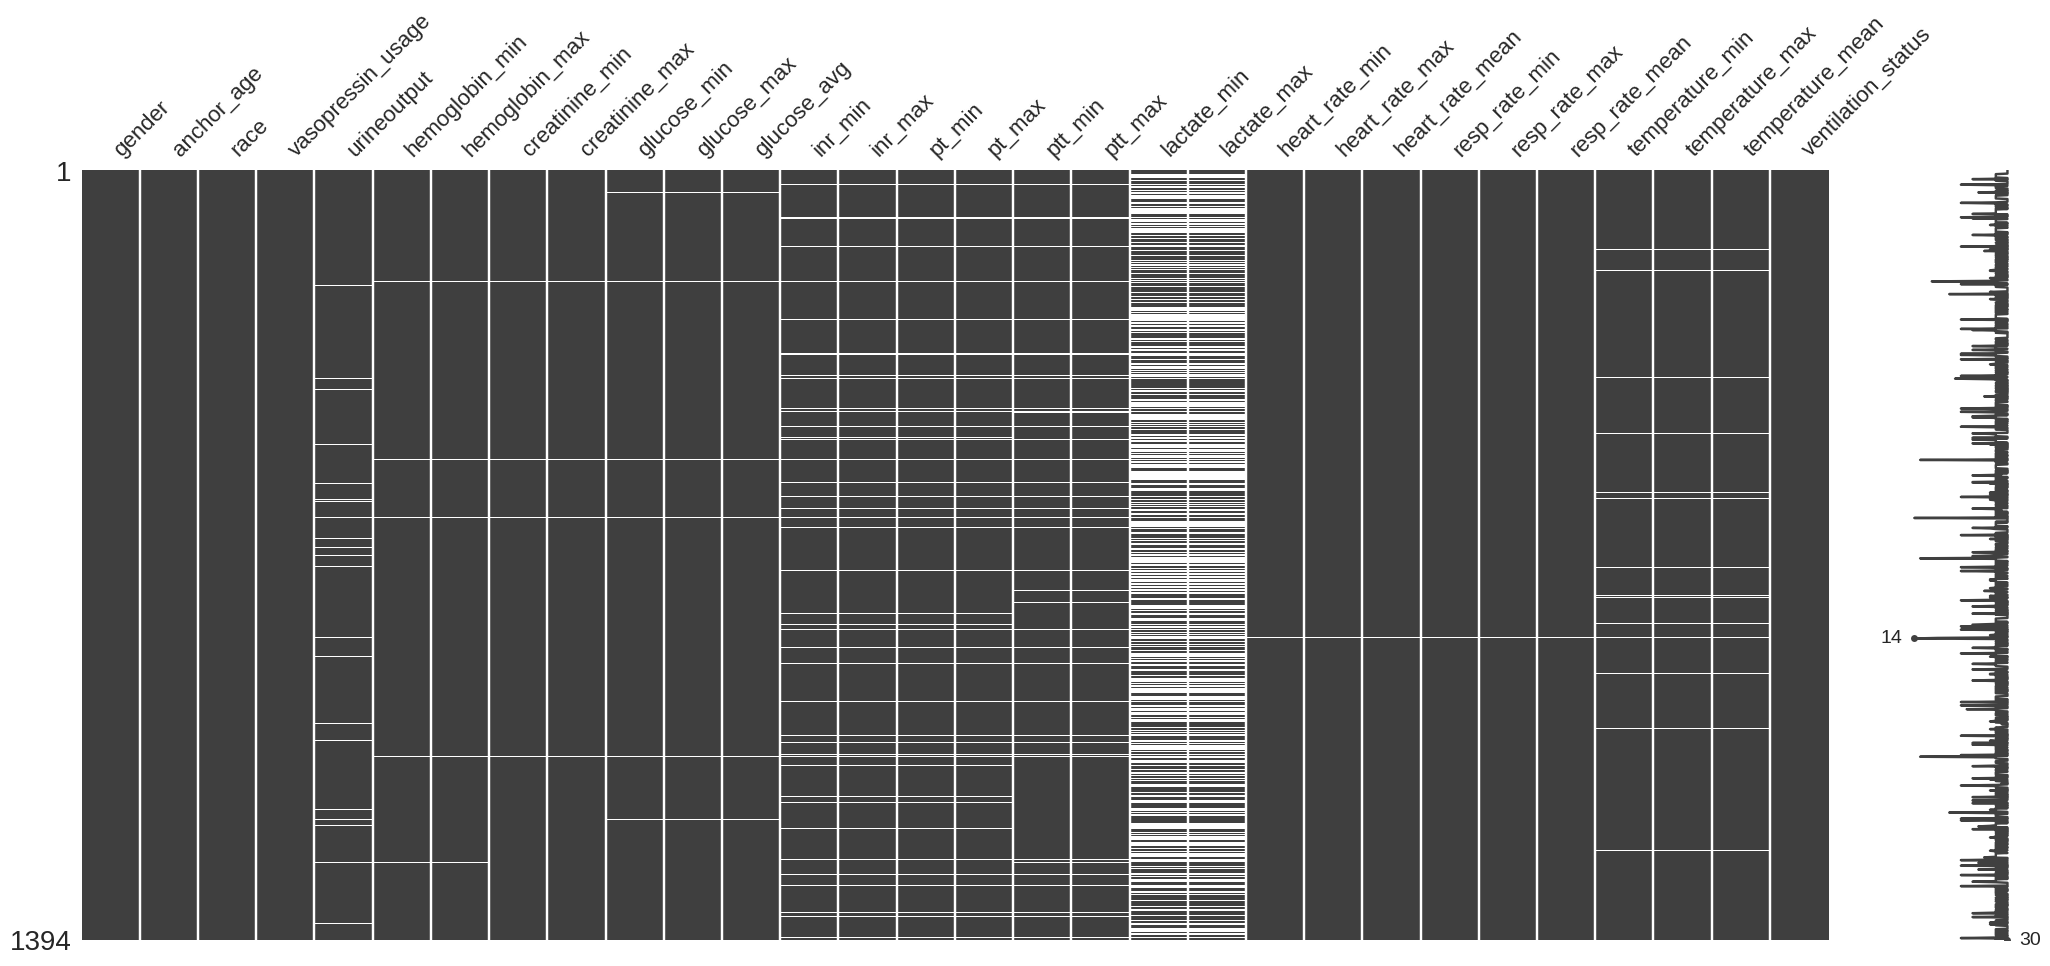

In [78]:
msno.matrix(X_train)

##### **Data imputation**

Since the portion of missing values are relatively low in most columns, we impute the missing values with median.

In [79]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
imp.fit(X_train)
X_train = pd.DataFrame(imp.transform(X_train), columns=columns)
if USE_TEST_DATA:
  X_test = pd.DataFrame(imp.transform(X_test), columns=columns)

### Normalization

We scale the variables of the dataset into nomal distributions, which will help improve model interpretability.

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
if USE_TEST_DATA:
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Oversampling and Undersampling

Since we are working on a imbalance dataset, i.e. the portion of in-hopital death (16.14%) is significantly lower than that of survival (83.86%), we perform oversampling to multiply the number of in-hospital death. This will reduce the bias in the model, allowing the model to make predictions based on the underlying patterns in both classes, rather than being dominated by the majorit class.

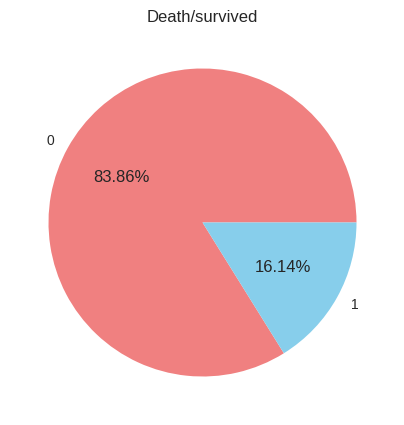

In [81]:
plt.figure(figsize=(5, 5))
y_train.value_counts().plot(kind='pie', colors=['lightcoral', 'skyblue'], autopct='%1.2f%%')
plt.title('Death/survived')
plt.ylabel('')
plt.show()

In [82]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

Oversampling uses existing data to create more data for the minor class. After this, the portion of in-hospital death and none in-hospital death become the same.

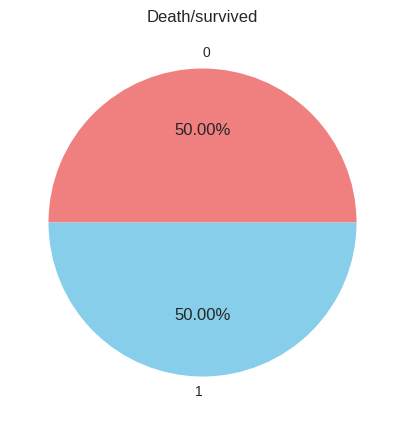

In [83]:
plt.figure(figsize=(5, 5))
y_train.value_counts().plot(kind='pie', colors=['lightcoral', 'skyblue'], autopct='%1.2f%%')
plt.title('Death/survived')
plt.ylabel('')
plt.show()

#### Undersampling

Although oversampling can produce data to enhance prediction accuracy, it can lead to some noise . So, we perform undersampling to remove noisy data or data that are too similar to the original data.

In [84]:
from imblearn.under_sampling import TomekLinks
X_train, y_train = TomekLinks().fit_resample(X_train, y_train)

Now, the portion of in-hospital death and none in-hospital death are close.

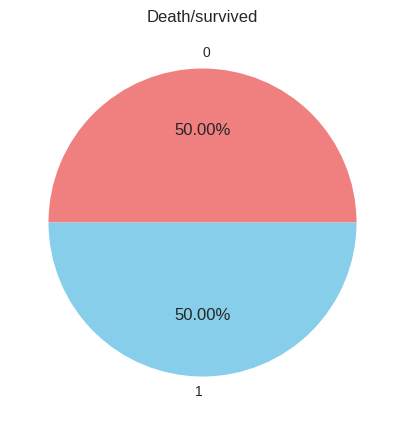

In [85]:
plt.figure(figsize=(5, 5))
y_train.value_counts().plot(kind='pie', colors=['lightcoral', 'skyblue'], autopct='%1.2f%%')
plt.title('Death/survived')
plt.ylabel('')
plt.show()

# Step 3 - Build Models

In this section, we trained classifiers, including Support Vector Machine (SVM), K-Nearest Neighbor (KNN), eXtreme Gradient Boosting (XGBoost), and Multi-Layer Perceptron (MLP) and evaluated with 5-fold cross validation on AUC values.

We use linear regression as the baseline for selecting best models.

### Setting Environment

In [86]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.model_selection import cross_val_score

### Linear Model

#### Simple Regression

Linear regression is a fundamental supervised learning algorithm that find the linear relationship betweeng variables. The averaged AUC score is 0.7269, and we will later use this as the baseline to fine-tuned the following model.

In [87]:
from sklearn.linear_model import LinearRegression

# Train model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_linear = model_linear.predict(X_test)
  predict_linear[predict_linear >= 0.5] = 1
  predict_linear[predict_linear < 0.5] = 0

In [88]:
if USE_TEST_DATA:
  scores = cross_val_score(model_linear, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_linear, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.65       0.85685484 0.62865948 0.85020243 0.64890282]
Averaged AUC score:  0.7269239130586385


We can also use other metrics, such as Means Squared Error (MSE) and Coefficient of Determination ($R^2$), to evaluate the performance of linear regression. Although the MSE value is relatively small (0.22), the linear model has negative $R^2$, which means that it is the wrong model.

In [89]:
if USE_TEST_DATA:
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test, predict_linear))
  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, predict_linear))

Mean squared error: 0.22
Coefficient of determination: -0.74


Through linear regression, we can take a quick glance at the important featuers that involve in predicting the labels.

In this case, feature 3 (`vasopressin_usage`), feature 6 (`hemoglobin_max`), and feature 29 (`ventilation_status`) have larger coefficients, indicating that they have more weight on affecting the results.

In [90]:
print('Examine regression coefficients:')
model_linear_coef = pd.DataFrame(model_linear.coef_)
model_linear_coef

Examine regression coefficients:


,0
0,0.030949
1,0.088516
2,-0.006359
3,0.371370
4,-0.078750
5,0.025001
6,-0.133262
7,-0.040241
8,0.038995
9,0.020201


#### Ridge

Ridge regression introduces regularization to prevent overfitting in linear regression. We can use α value to adjust the weight of regularization term.

In [91]:
from sklearn.linear_model import Ridge

# Train model
model_ridge = Ridge(alpha = 10)
model_ridge.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_ridge = model_ridge.predict(X_test)
  predict_ridge[predict_ridge >= 0.5] = 1
  predict_ridge[predict_ridge < 0.5] = 0

In [92]:
if USE_TEST_DATA:
  scores = cross_val_score(model_ridge, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_ridge, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.69       0.875      0.64560863 0.83940621 0.73981191]
Averaged AUC score:  0.7579653497424884


We can use MSE and $R^2$ for ridge regression as well. However, the result is the same as the linear model.

In [93]:
if USE_TEST_DATA:
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test, predict_ridge))
  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, predict_ridge))

Mean squared error: 0.22
Coefficient of determination: -0.69


In residual plot, we can evaluate the ridge regression in terms of residuals. Generally, the residuals should be completely at random and not folowing any patterns. Here, we can observe two lines in the plot, which means that the variables are not linear. Thus, ridge regression may be too simple for this dataset and more complex model is needed.

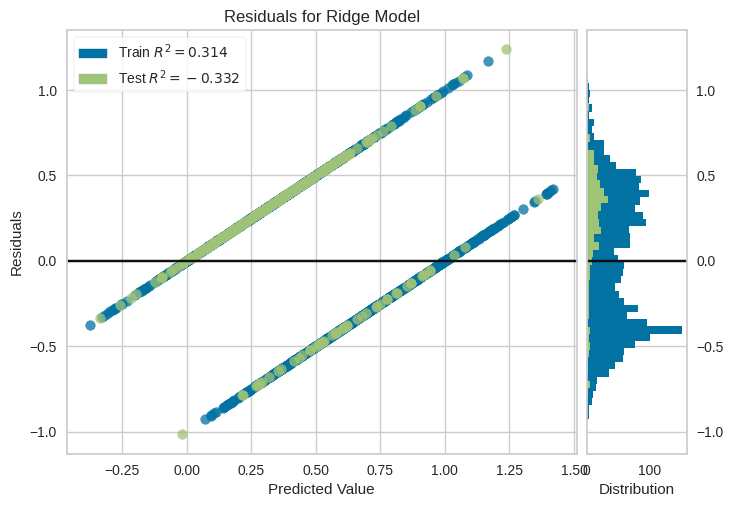

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [94]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

visualizer = ResidualsPlot(model_ridge)
visualizer.fit(X_train, y_train)
if USE_TEST_DATA:
  visualizer.score(X_test, y_test)
visualizer.show()

### Support Vector Machine (SVM)

SVM finds the optimal hyperplane that separates diffent classes in the feature space. For binary classification, the hyperplan is chosen to maximaize the margin between two classes. We can also extended SVM to handle non-linear decision boundaries by changing the kernel. In particular, we can use `poly`, `rbf`, and `sigmoid` to fine-tune the model.

In [95]:
from sklearn.svm import SVC

# Train model
model_svc = SVC(kernel='rbf', gamma='auto', degree=3, probability=True) # kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, gamma: {‘scale’, ‘auto’}
model_svc.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_svc = model_svc.predict(X_test)

In [96]:
if USE_TEST_DATA:
  scores = cross_val_score(model_svc, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_svc, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.795      0.79198767 0.75038521 0.73189522 0.8220339 ]
Averaged AUC score:  0.7782604006163328


### K-Nearest Neighbor (KNN)

KNN assumes that similar instances tend to have similar output values. Thus, it assigns a data points in the feature space to the majority class among its $k$ nearest neighbors. We can adjust the hyperparameter $k$ to obtain a better clustering.

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Train model
model_knn = KNeighborsClassifier(n_neighbors=90)
model_knn.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_knn = model_knn.predict(X_test)

In [98]:
if USE_TEST_DATA:
  scores = cross_val_score(model_knn, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_knn, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.73666667 0.72419106 0.77041602 0.72727273 0.75169492]
Averaged AUC score:  0.7420482794042116


### Naive Bayes

Naive bayes calculates the conditional probability of each class given the input features and selects the class with the highest probability as the predicted class. We can assumes different feature distribution and make prediction based on this assumption. The most common ones include Gaussian Naive Bayes (normal distribution), Multinomial Naive Bayes (discrete data), and Bernoulli Naive Bayes (binary data).

In [99]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

# Train model
model_gnb = GaussianNB() # GaussianNB(), BernoulliNB(alpha=1.0)
model_gnb.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_gnb = model_gnb.predict(X_test)

In [100]:
if USE_TEST_DATA:
  scores = cross_val_score(model_gnb, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_gnb, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.855      0.77195686 0.82434515 0.81201849 0.89322034]
Averaged AUC score:  0.8313081664098613


### Random Forest

Random forest is an ensemble learning algorithm that comines the prediction of multiple individual decision trees to make more accurate and robust predictions.

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model_rf = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
model_rf.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_rf = model_rf.predict(X_test)

In [102]:
if USE_TEST_DATA:
  scores = cross_val_score(model_rf, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.82166667 0.77657935 0.88135593 0.7596302  0.91186441]
Averaged AUC score:  0.8302193117616845


### eXtreme Gradient Boosting (XGBoost)

XGBoost implements gradient boosting to build an ensemble of weak learners (typically decision trees) in sequential manner. It used to produce high predictive accuracy in hadling complex datasets.

In [103]:
from xgboost import XGBClassifier

# Train model
model_xgb = XGBClassifier(n_estimators=200, learning_rate=3e-1, max_depth=5)
model_xgb.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_xgb = model_xgb.predict(X_test)

In [104]:
if USE_TEST_DATA:
  scores = cross_val_score(model_xgb, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.71833333 0.85516179 0.88906009 0.81510015 0.87627119]
Averaged AUC score:  0.8307853107344633


### Neural Network

Neural network is composed of multiple layers of neurons that process information. Connections between neurons are represented by weight, which determine the strength of the connection.

In [105]:
from sklearn.neural_network import MLPClassifier

# Train model
model_mlp = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(16, 8, 4), max_iter=500) # solver{‘lbfgs’, ‘sgd’, ‘adam’}
model_mlp.fit(X_train, y_train)

# Predict labels
if USE_TEST_DATA:
  predict_mlp = model_mlp.predict(X_test)

In [106]:
if USE_TEST_DATA:
  scores = cross_val_score(model_mlp, X_test, y_test, cv=5, scoring='roc_auc')
else:
  scores = cross_val_score(model_mlp, X_train, y_train, cv=5, scoring='roc_auc')
print('5-fold cross validation on AUC score: ', scores)
print('Averaged AUC score: ', np.mean(scores))

5-fold cross validation on AUC score:  [0.6225     0.77580894 0.57550077 0.69799692 0.66440678]
Averaged AUC score:  0.6672426810477659


# Step 4 - Analysis
---


### General Report


In [107]:
classifiers_name = ['SVM', 'KNN', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Neural Network']
classifiers = [model_svc, model_knn, model_gnb, model_rf, model_xgb, model_mlp]
predictions = [predict_svc, predict_knn, predict_gnb, predict_rf, predict_xgb, predict_mlp]

#### **Classification report**

First, overview the prediction results. It seems that the label is not perfectly predicted. It is noteworthy that the KNN classifier has more tendency to predict positive than other models.

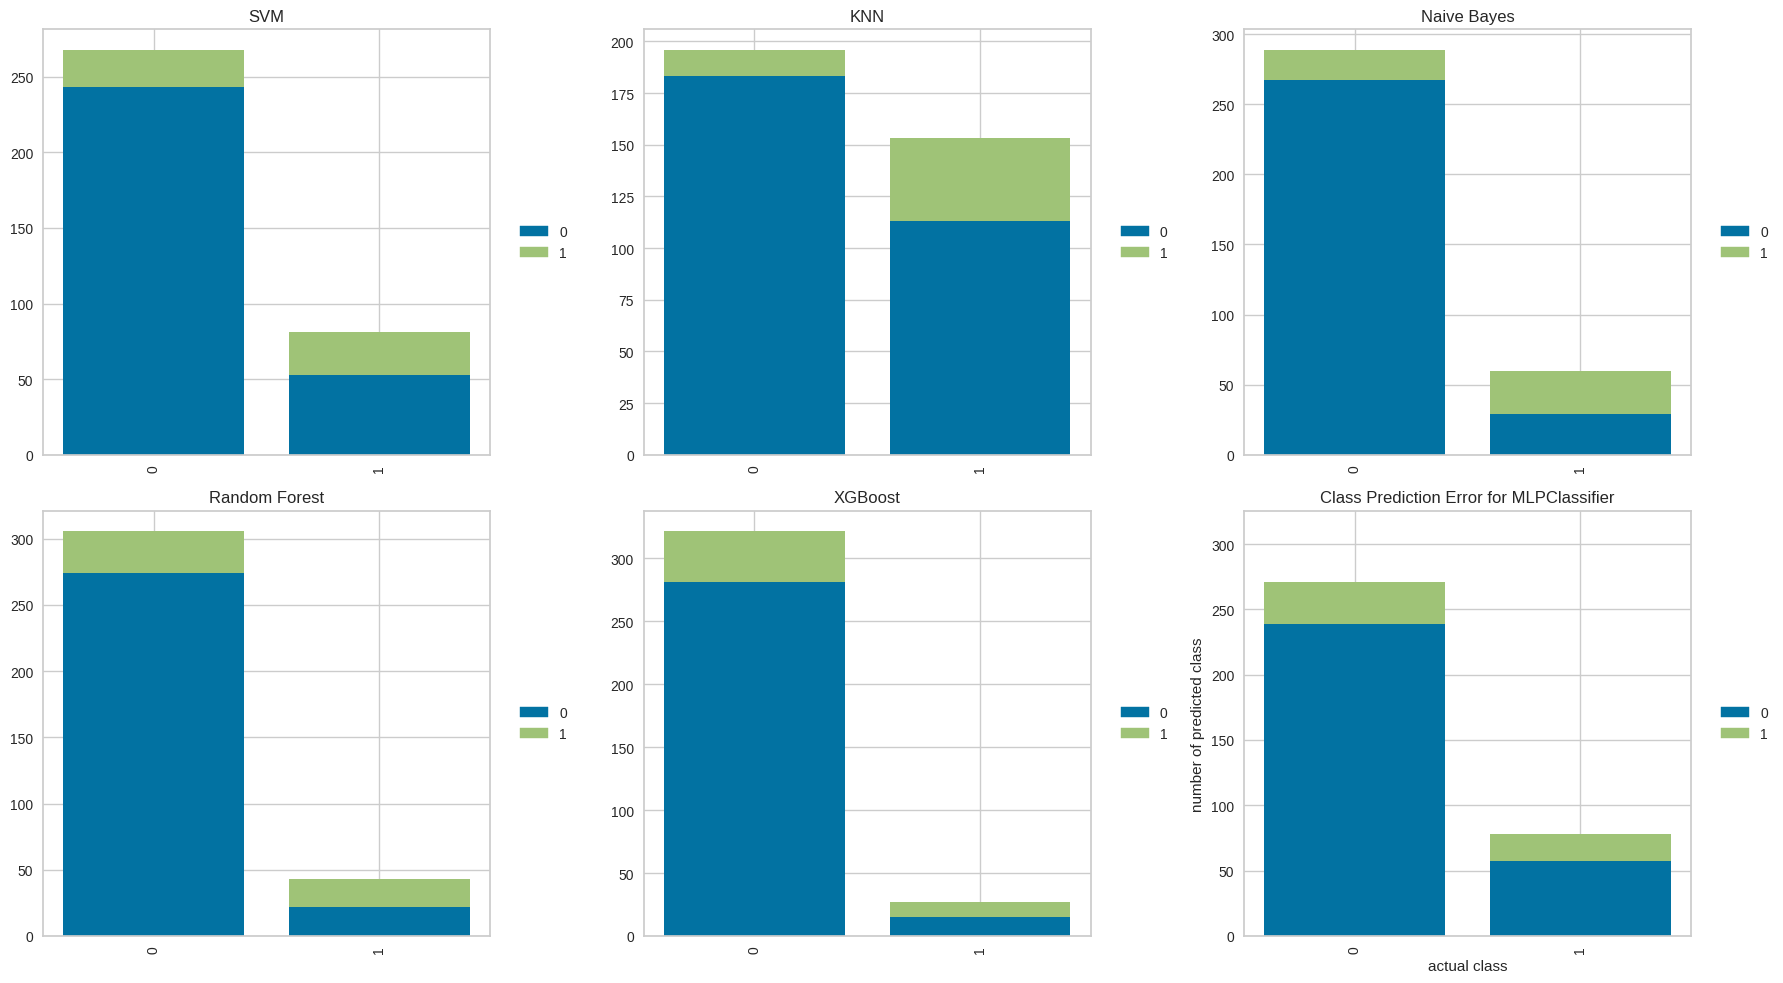

In [108]:
from yellowbrick.classifier import ClassificationReport, ClassPredictionError

plt.figure(figsize=(20,10))
for i in range(len(classifiers)):
  plt.subplot(231+i)
  visualizer = ClassPredictionError(classifiers[i], classes=[0,1])
  visualizer.fit(X_train, y_train.ravel())
  if USE_TEST_DATA:
    visualizer.score(X_test, y_test.ravel())
  else:
    visualizer.score(X_train, y_train.ravel())
  plt.title(classifiers_name[i])
visualizer.show();

#### **Confusion matrix**

We can take a closer look into how well the classifiers predict the label by ploting confusion matrix. Although most classifier attains high accuracies, they produces low precisions, recalls, specificities, and f1-scores.

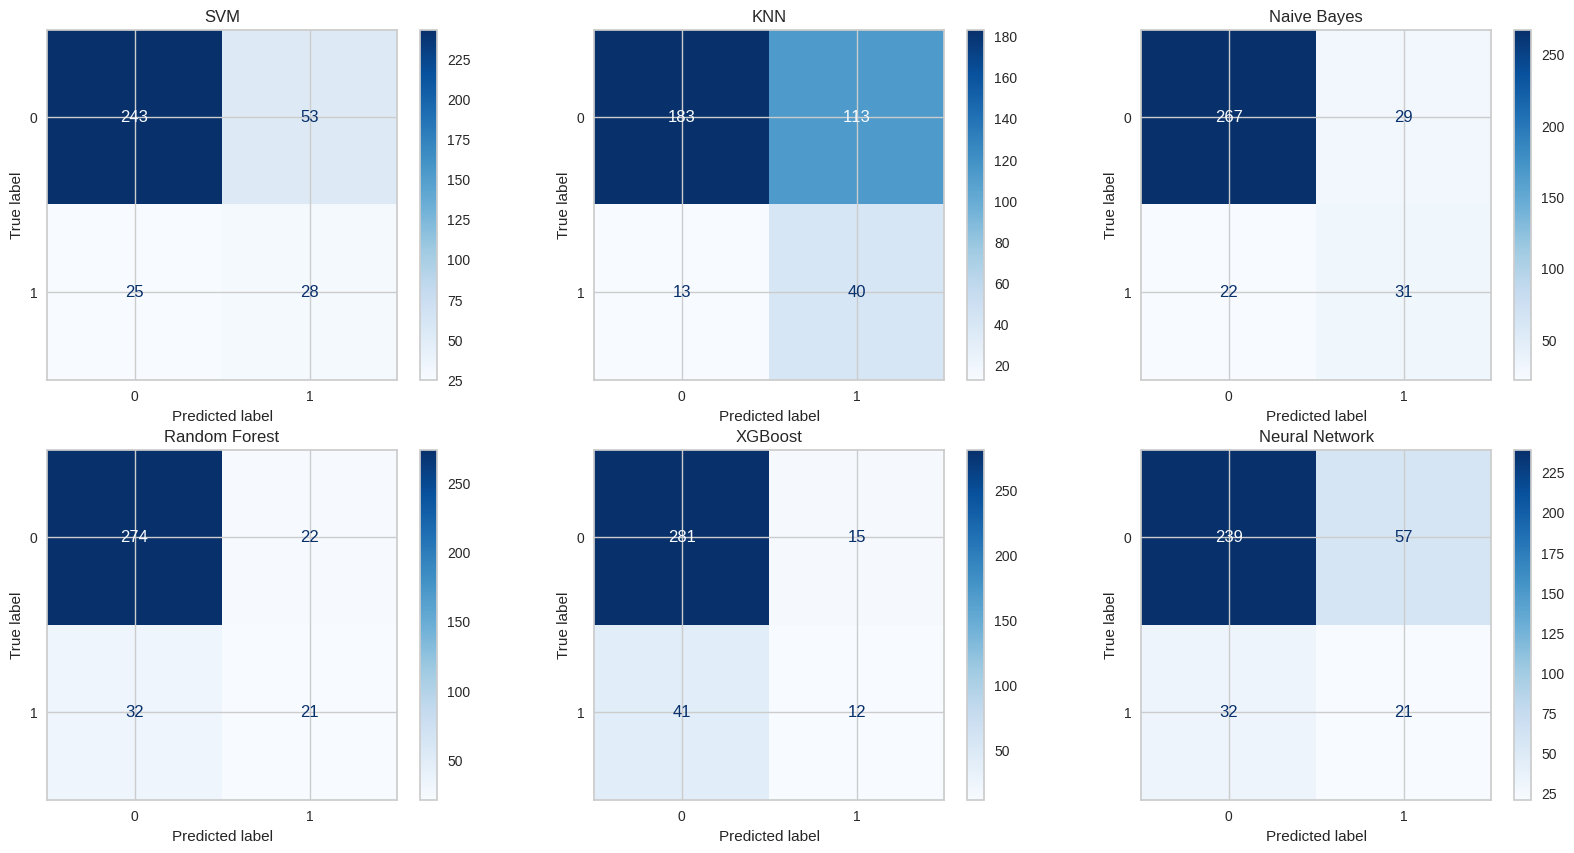

In [109]:
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(2, 3, figsize=(20,10))

for i in range(len(classifiers)):
  col, row = i%3, i//3
  axs[row,col].title.set_text(classifiers_name[i])
  if USE_TEST_DATA:
    ConfusionMatrixDisplay(confusion_matrix(y_test, predictions[i])).plot(ax=axs[row, col], cmap='Blues')
  else:
    ConfusionMatrixDisplay(confusion_matrix(y_train, predictions[i])).plot(ax=axs[row, col], cmap='Blues')

plt.show()

#### **ROC curve**

In ROC curve, illustrates the trade-off between sensitivity and specificty. An ideal classifier would have an ROC curve that goes straight up to the top-left corner, resulting in an AUC equal to 1. Yet, none of the classifiers reaches a 0.8 AUC value. The Naive Bayes model attains the highest AUC value (0.725), followed by random forest (0.685) and KNN (0.682).

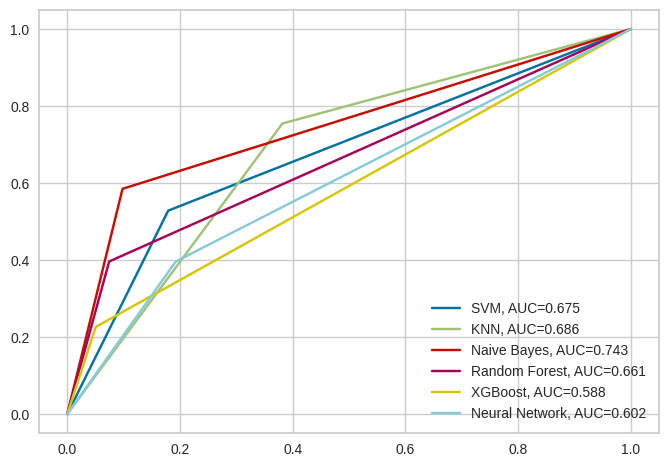

In [110]:
for i in range(len(classifiers)):
  if USE_TEST_DATA:
    fpr, tpr, thresholds = roc_curve(y_test, predictions[i])
  else:
    fpr, tpr, thresholds = roc_curve(y_train, predictions[i])
  roc_auc = round(auc(fpr, tpr), 3)
  # RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
  plt.plot(fpr, tpr, label=classifiers_name[i]+", AUC="+str(roc_auc))
plt.legend(loc='lower right')
plt.show()

#### **Calibration plot**

A calibration plot assess how well the predicted probabilities from a classification model align with the observed outcomes. Here, the random forest classifier has the highest reliability of predicting probabilities as it is closer to the diagonal line that indicates a perfect calibration.

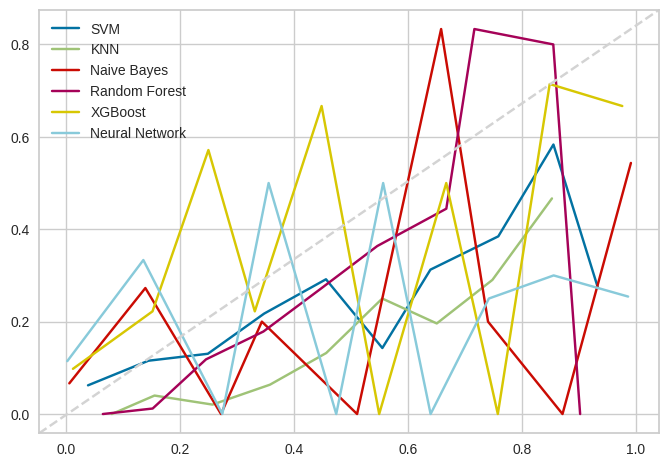

In [111]:
fig, ax = plt.subplots()
for i in range(len(classifiers)):
  if USE_TEST_DATA:
    y_prob = classifiers[i].predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
  else:
    y_prob = classifiers[i].predict_proba(X_train)[:, 1]
    prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=10)

  plt.plot(prob_pred, prob_true, label=classifiers_name[i])

line = matplotlib.lines.Line2D([0,1], [0,1], color='lightgray', linestyle='--')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.legend(loc='upper left')
plt.show()

#### **Other evaluation metrics**

Most classifiers can attains an accuracy and AUC value near 0.7 or higher. However, they have low reliability in terms of recall, precision and f1-score.

In [112]:
# !pip install dalex
import dalex as dx

for i in range(len(classifiers)):
  fairness_explainer = dx.Explainer(classifiers[i], X_test, y_test, verbose=False)
  if i == 0:
    results = fairness_explainer.model_performance().result
  else:
    results = results.append(fairness_explainer.model_performance().result)
results

,recall,precision,f1,accuracy,auc
SVC,0.452830,0.338028,0.387097,0.782235,0.742351
KNeighborsClassifier,0.773585,0.261146,0.390476,0.633238,0.733969
GaussianNB,0.584906,0.516667,0.548673,0.853868,0.809855
RandomForestClassifier,0.396226,0.488372,0.437500,0.845272,0.827894
XGBClassifier,0.226415,0.444444,0.300000,0.839542,0.773840
MLPClassifier,0.396226,0.269231,0.320611,0.744986,0.649222


#### **Model Selection**

We selected the model according to its averaged AUC values and its overall scores. The Random Forest classifier has the best performance and we'll use this model to conduct the following analysis.

In [113]:
best_model = model_rf

# Predict label
if USE_TEST_DATA:
  best_predict = best_model.predict(X_test)
else:
  best_predict = best_model.predict(X_train)

### Feature Analysis

In this section, we conduct feature analysis to find out the important features in predicting the label.

In [114]:
# Feature Importance
# !pip install shap
import shap

explainer = shap.Explainer(best_model.predict, X_train, feature_name=columns)

if USE_TEST_DATA:
  shap_values = explainer(X_test)
else:
  shap_values = explainer(X_train)

PermutationExplainer explainer: 350it [02:55,  1.87it/s]


The following plot shows feature 3 (`vasopressin_usage`), feature 19 (`heart_rate_min`), and feature 18 (`lactate_min`) has more weight in predicting labels. This correspond to the analysis in homework 2 where `vasopressin_usage`, `heart_rate_min`, and`lactate_min` are also considered the important features.

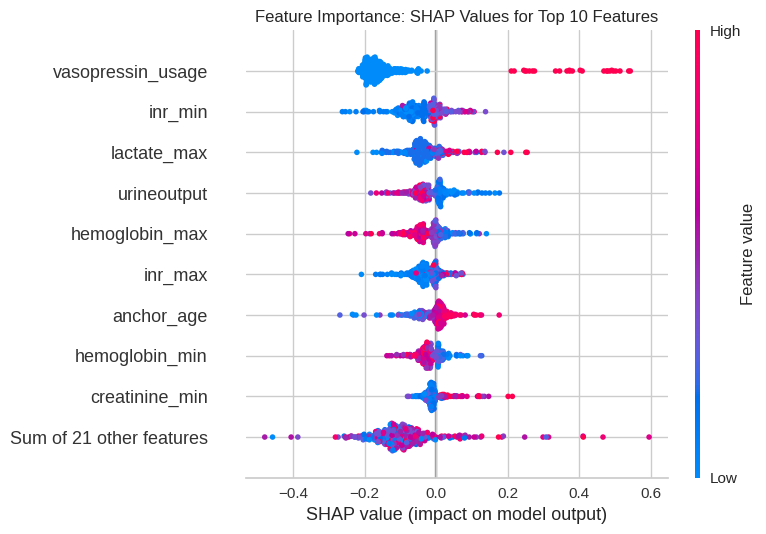

In [115]:
shap.plots.beeswarm(shap_values, show=False)
plt.title("Feature Importance: SHAP Values for Top 10 Features")
plt.tight_layout()
plt.show()

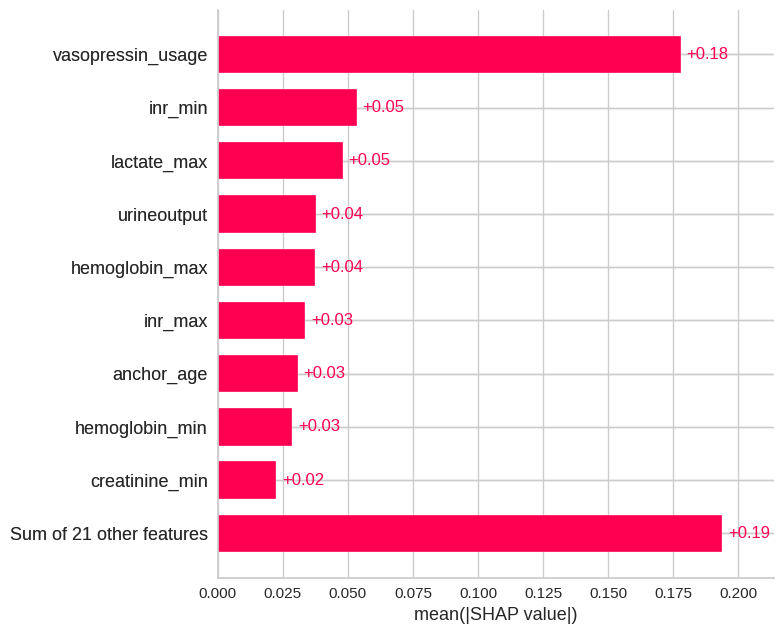

In [116]:
shap.plots.bar(shap_values, show=False)
plt.tight_layout()
plt.show()

### Fairness Analysis

In this dataset, white peolpe are dominant race of the patients, followed by black and hispanic. Fairness analysis checks that the model will not be affected by privilige groups.

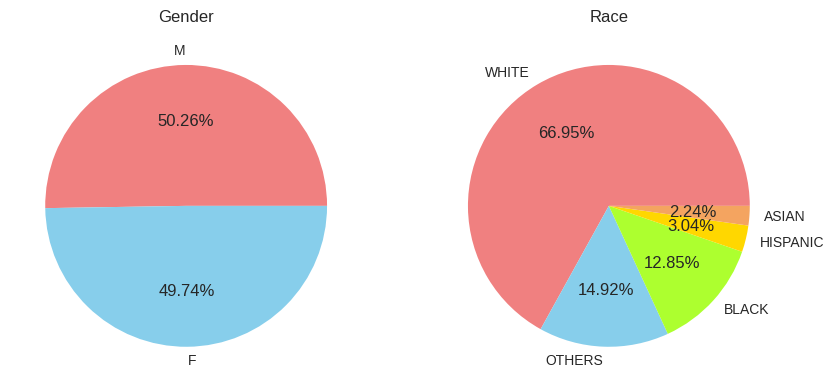

In [117]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
df['gender'].value_counts().plot(kind='pie', colors=['lightcoral', 'skyblue'], autopct='%1.2f%%')
plt.title('Gender')
plt.ylabel('')


plt.subplot(122)
df['race'].value_counts().plot(kind='pie', colors=['lightcoral', 'skyblue', 'greenyellow', 'gold', 'sandybrown'], autopct='%1.2f%%')
plt.title('Race')
plt.ylabel('')

plt.show()

##### **Fariness in AUC value**

The AUC values in white people and other race groups are relatively low, which indicates that the model the may be biased toward predicting the dominant class, resulting in a higher true negative rate but a lower true positive rate..

In [118]:
race_name = ['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHERS']
df_fair = X_test[['race']]

df_fair['predict'] = best_predict
df_fair['label'] = [1 if l == 1 else 0 for l in y_test]

for i in range(5):
  fpr, tpr, thresholds = roc_curve(df_fair[df_fair.race==i]['label'], df_fair[df_fair.race==i]['predict'])
  roc_auc = round(auc(fpr, tpr), 3)
  if i == 0:
    auc_fair = pd.DataFrame([[race_name[i], roc_auc]], columns=['race', 'auc'])
  else:
    auc_fair = auc_fair.append(pd.DataFrame([[race_name[i], roc_auc]], columns=['race', 'auc']), ignore_index=True)
auc_fair

,race,auc
0,WHITE,1.000
1,BLACK,0.630
2,HISPANIC,0.750
3,ASIAN,0.675
4,OTHERS,0.638


##### **Fairness in other metrics**

We compare the fairness in other metrics for the best model with KNN and find out that the model is biased.

* Fairness for black

In [119]:
fairness_explainer = dx.Explainer(best_model, X_test, y_test, verbose=False)
fairness_explainer2 = dx.Explainer(model_knn, X_test, y_test, verbose=False)
protected = np.where(X_test.race == 1, 'black', "else")
privileged = 'else'
fobject = fairness_explainer.model_fairness(protected, privileged)
fobject2 = fairness_explainer2.model_fairness(protected, privileged)
print('Fairness check for best models\n-------------------------')
fobject.fairness_check()
print('\n\nFairness check for xgb models\n-------------------------')
fobject2.fairness_check()

Fairness check for best models
-------------------------
Bias detected in 4 metrics: TPR, PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
            TPR       ACC       PPV       FPR       STP
black  0.692494  1.029691  1.404211  0.320988  0.507576


Fairness check for xgb models
-------------------------
No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
           TPR       ACC       PPV       FPR       STP
black  1.12615  1.062102  1.176471  0.931646  0.984479


In [120]:
fobject.plot(fobject2)

* Fairness for hispanic

In [121]:
fairness_explainer = dx.Explainer(best_model, X_test, y_test, verbose=False)
fairness_explainer2 = dx.Explainer(model_knn, X_test, y_test, verbose=False)
protected = np.where(X_test.race == 2, 'hispanic', "else")
privileged = 'else'
fobject = fairness_explainer.model_fairness(protected, privileged)
fobject2 = fairness_explainer2.model_fairness(protected, privileged)
print('Fairness check for best models\n-------------------------')
fobject.fairness_check()
print('\n\nFairness check for xgb models\n-------------------------')
fobject2.fairness_check()

Fairness check for best models
-------------------------
Bias detected in 2 metrics: TPR, PPV

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
              TPR       ACC      PPV  FPR       STP
hispanic  1.27551  1.053318  2.10084  NaN  0.895161

Warning!
Take into consideration that NaN's are present, consider checking 'metric_scores' plot to see the difference


Fairness check for xgb models
-------------------------
Bias detected in 2 metrics: TPR, PPV

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
              TPR      ACC      PPV       FPR       STP
hispanic  1.30719  1.05538  1.55642  1.097187  1.243848


In [122]:
fobject.plot(fobject2)

* Fairness for asian


In [123]:
fairness_explainer = dx.Explainer(best_model, X_test, y_test, verbose=False)
fairness_explainer2 = dx.Explainer(model_knn, X_test, y_test, verbose=False)
protected = np.where(X_test.race == 3, 'asian', "else")
privileged = 'else'
fobject = fairness_explainer.model_fairness(protected, privileged)
fobject2 = fairness_explainer2.model_fairness(protected, privileged)
print('Fairness check for best models\n-------------------------')
fobject.fairness_check()
print('\n\nFairness check for xgb models\n-------------------------')
fobject2.fairness_check()

Fairness check for best models
-------------------------
Bias detected in 4 metrics: TPR, PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
            TPR       ACC       PPV       FPR       STP
asian  1.269022  0.877907  1.452055  1.710145  2.093458


Fairness check for xgb models
-------------------------
Bias detected in 2 metrics: PPV, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'else'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
            TPR       ACC       PPV       FPR       STP
asian  1.176391  1.036508  2.138249  1.145455  1.327907


In [124]:
fobject.plot(fobject2)

# Step 5 - Discussion
---

In this assignment, we have successfully built several classifiers that predict the mortality of pulmonary embolism patients. However, the performance is barely satisfactory. Here are some points that can be used to improve the models:

1. **Small dataset**: The number of total data is only 1743, resulting in a limited improvement on machine learning model. If we futher increase the size of the dataset, a higher accuracy can be expected.
2. **Imbalanced label**: Since the class in this dataset is highly imbalanced, the model performance can be easily swayed by majority groups. To address this problem, we use oversampling and undersampling techniques to enhance the perfomance. Yet, the sizes of training and testing dataset are so small that the improvement is very limited.
3. **Model fine-tuning**: Due to the time limit, we couldn't found the best model that fits the data well. In the future, we can use other techniques such as ensemble methods to combine multiple base classifier to improve overall performance.